# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

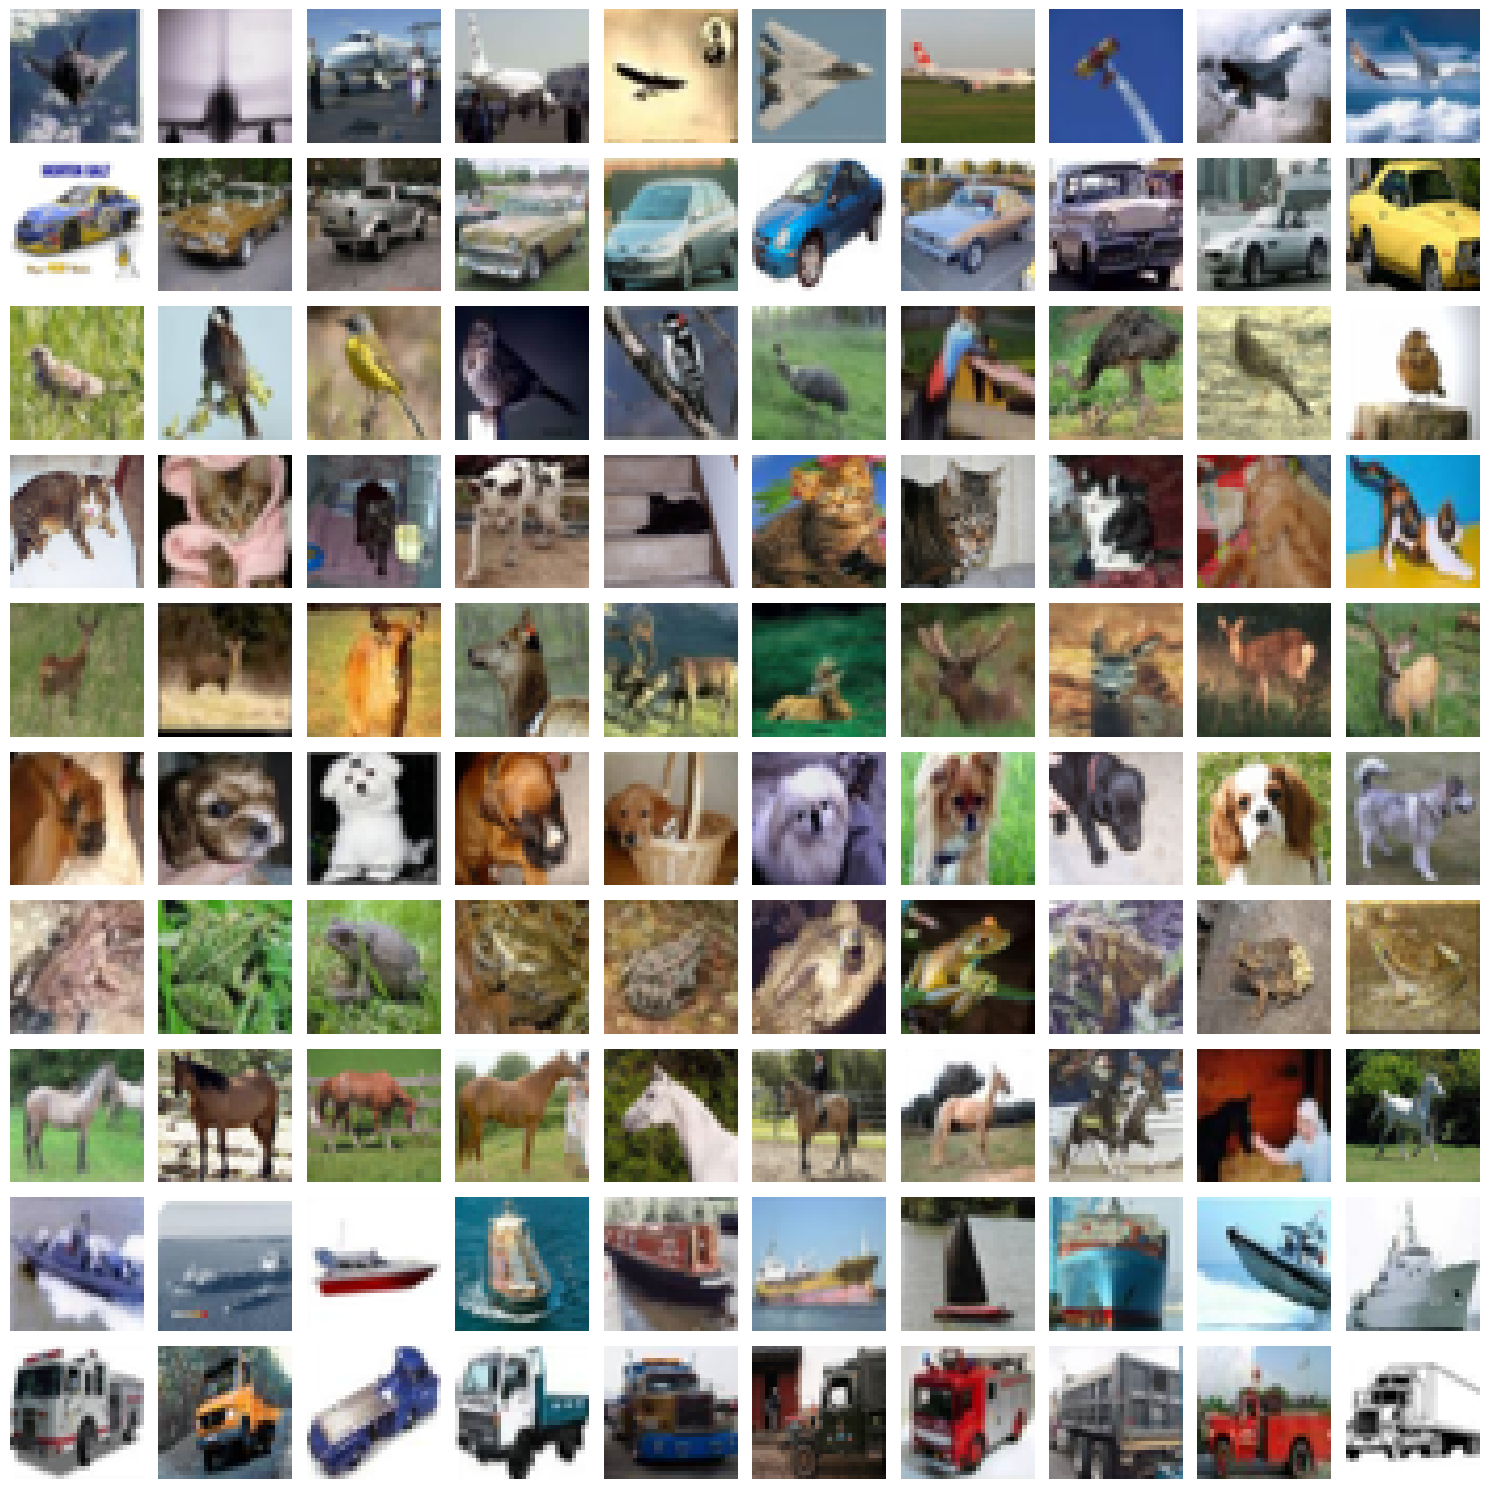

In [7]:
# Your code here :
# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded form
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Create a 10x10 plot showing 10 random samples from each class
num_classes = 10
samples_per_class = 10
fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(15, 15))

for class_index in range(num_classes):
    # Get indices of images for the current class
    class_indices = np.where(y_train.flatten() == class_index)[0]
    # Randomly select 10 images from the current class
    selected_indices = np.random.choice(class_indices, size=samples_per_class, replace=False)

    for sample_index, img_index in enumerate(selected_indices):
        # Plot the image
        axes[class_index, sample_index].imshow(x_train[img_index])
        axes[class_index, sample_index].axis('off')

# Set titles for each row
for ax, class_label in zip(axes[:, 0], range(num_classes)):
    ax.set_ylabel(f'Class {class_label}', size=12)

plt.tight_layout()
plt.show()

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [8]:
from keras.backend import clear_session
clear_session()

In [9]:
# Your code here :
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session

# Clear previous Keras session
clear_session()

# Define the model
model = Sequential()

# Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Dense layer with 100 units and ReLU activation
model.add(Dense(100, activation='relu'))

# Output layer with softmax activation for classification
model.add(Dense(10, activation='softmax'))

# Summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
# Your code here :
from keras.optimizers import SGD

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_one_hot,
                    batch_size=512,
                    epochs=50,
                    validation_data=(x_test, y_test_one_hot))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.1444 - loss: 2.2883 - val_accuracy: 0.2213 - val_loss: 2.2064
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2283 - loss: 2.1726 - val_accuracy: 0.2471 - val_loss: 2.0842
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2733 - loss: 2.0447 - val_accuracy: 0.3215 - val_loss: 1.9753
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3172 - loss: 1.9663 - val_accuracy: 0.3075 - val_loss: 1.9238
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3339 - loss: 1.9078 - val_accuracy: 0.3357 - val_loss: 1.8762
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3502 - loss: 1.8651 - val_accuracy: 0.3455 - val_loss: 1.8748
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3615 - loss: 1.8359 - val_accuracy: 0.3638 - val_loss: 1.8101
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3755 - loss: 1.7961 - val_accuracy: 0.3590 - v

*   Plot the cross entropy loss curve and the accuracy curve

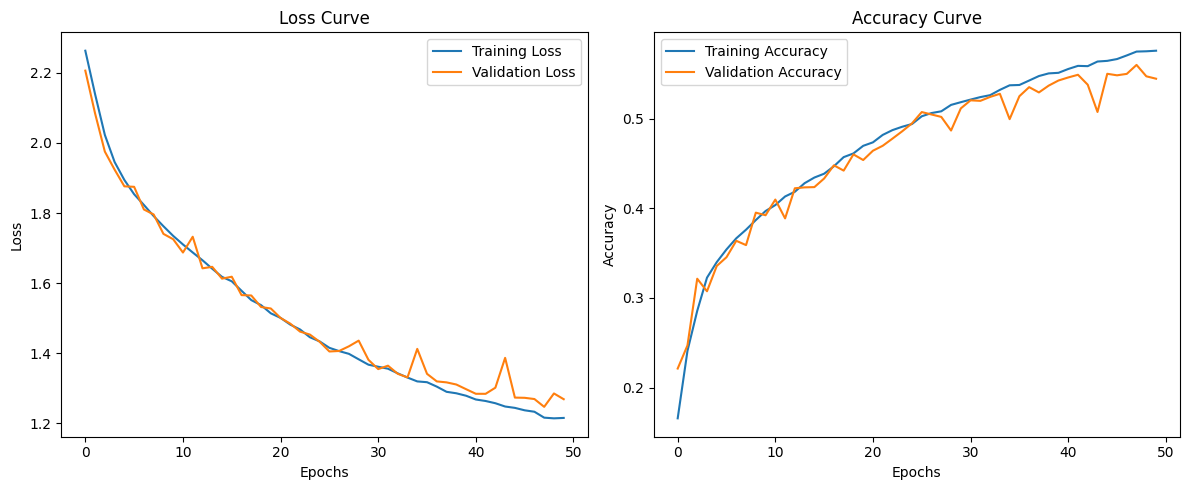

In [11]:
# Your code here :
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [12]:
from keras.backend import clear_session
clear_session()

In [13]:
# Your code here :
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session

# Clear previous Keras session
clear_session()

# Define the VGG-like model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Dense layer with 128 units
model.add(Dense(128, activation='relu'))

# Output layer with softmax activation for classification
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_one_hot,
                    batch_size=512,
                    epochs=50,
                    validation_data=(x_test, y_test_one_hot))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.1360 - loss: 2.2852 - val_accuracy: 0.2352 - val_loss: 2.1792
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2430 - loss: 2.1269 - val_accuracy: 0.2935 - val_loss: 2.0069
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2793 - loss: 2.0211 - val_accuracy: 0.3331 - val_loss: 1.9090
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3227 - loss: 1.9274 - val_accuracy: 0.3408 - val_loss: 1.8693
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3501 - loss: 1.8653 - val_accuracy: 0.3458 - val_loss: 1.8714
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3646 - loss: 1.8219 - val_accuracy: 0.3676 - val_loss: 1.8015
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3815 - loss: 1.7795 - val_accuracy: 0.3934 - val_loss: 1.7582
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3923 - loss: 1.7445 - val_accuracy: 0.4004 - 

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [14]:
# Your code here :
from keras.optimizers import SGD

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_one_hot,
                    batch_size=512,
                    epochs=50,
                    validation_data=(x_test, y_test_one_hot))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.6282 - loss: 1.0627 - val_accuracy: 0.5865 - val_loss: 1.1693
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6365 - loss: 1.0482 - val_accuracy: 0.5924 - val_loss: 1.1555
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6316 - loss: 1.0586 - val_accuracy: 0.5886 - val_loss: 1.1820
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6364 - loss: 1.0449 - val_accuracy: 0.6031 - val_loss: 1.1317
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6447 - loss: 1.0246 - val_accuracy: 0.5994 - val_loss: 1.1273
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6444 - loss: 1.0234 - val_accuracy: 0.6062 - val_loss: 1.1126
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6464 - loss: 1.0126 - val_accuracy: 0.6092 - val_loss: 1.1206
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6545 - loss: 0.9959 - val_accuracy: 0.6023 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


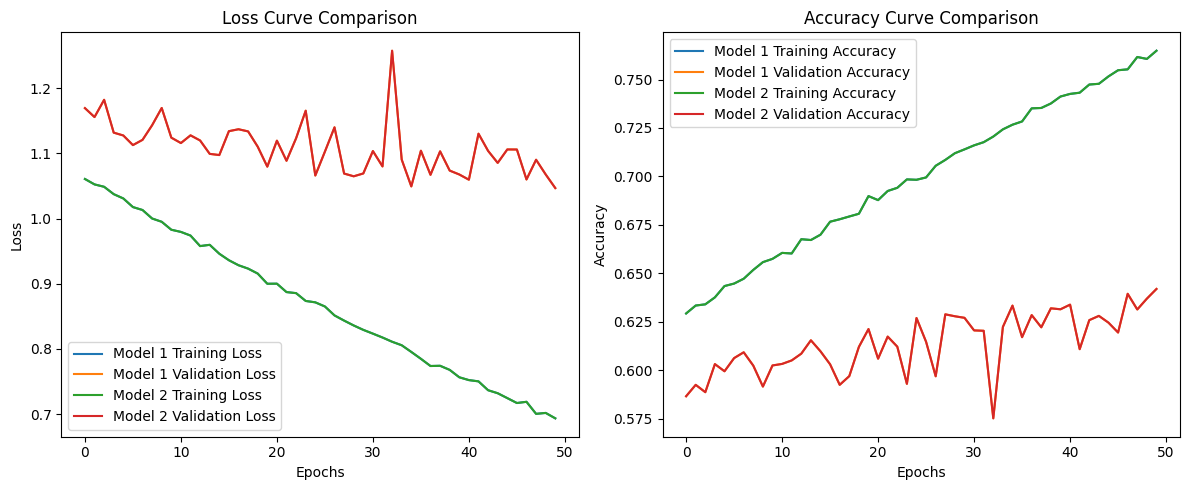

In [15]:
# Your code here :
import matplotlib.pyplot as plt

# Assuming 'history1' is the training history of the first model
# and 'history2' is the training history of the VGG-like deeper model

# Plotting the training and validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Model 1 Training Loss')
plt.plot(history.history['val_loss'], label='Model 1 Validation Loss')
plt.plot(history.history['loss'], label='Model 2 Training Loss')
plt.plot(history.history['val_loss'], label='Model 2 Validation Loss')
plt.title('Loss Curve Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Model 1 Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Model 1 Validation Accuracy')
plt.plot(history.history['accuracy'], label='Model 2 Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Model 2 Validation Accuracy')
plt.title('Accuracy Curve Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

**Comment on the observation**

*(Loss Curves:

Training Loss: Both models' training loss should ideally decrease over epochs. If the deeper model has a lower training loss, it suggests better fitting to the training data.

Validation Loss: Compare the validation losses. If the deeper model shows a lower validation loss, it indicates better generalization to unseen data. If validation loss increases while training loss decreases, it suggests overfitting.

Accuracy Curves:

Training Accuracy: Higher training accuracy in the deeper model indicates it is capturing more patterns from the training data.

Validation Accuracy: The model with higher validation accuracy is performing better on unseen data. If the deeper model consistently has a higher validation accuracy, it suggests that the additional layers help in learning more complex features.

Overall Performance:

If the deeper model performs better (lower loss and higher accuracy), it indicates that the architecture's depth is beneficial for this dataset.
If both models perform similarly, the simpler model might be sufficient, indicating that increasing model complexity does not always yield better results.)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [16]:
# Your code here :
import numpy as np

# Predict the output for the test split
predictions = model.predict(x_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


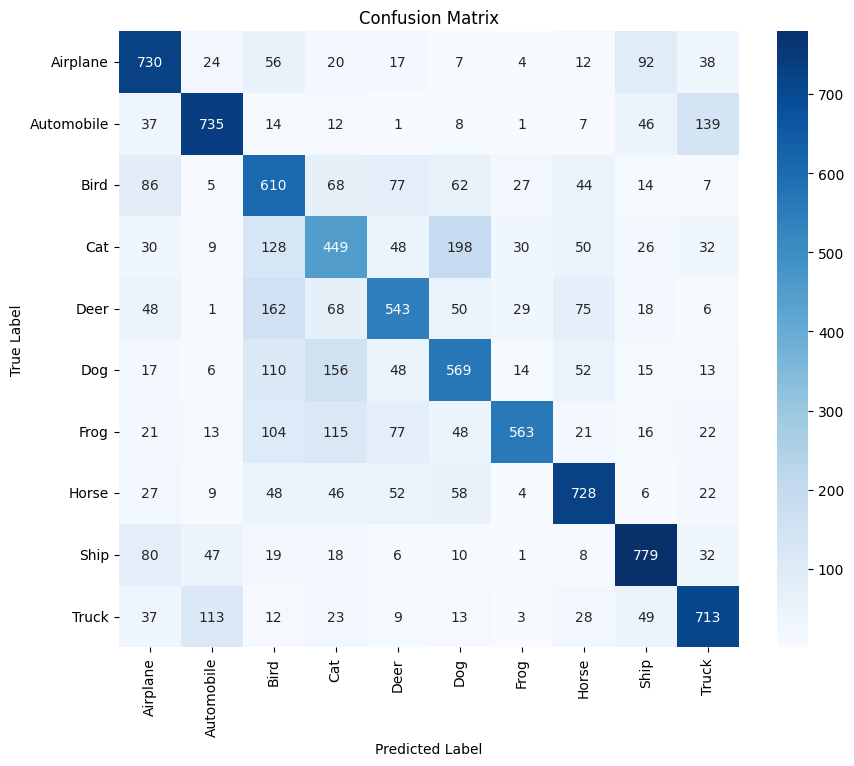

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels in one-hot encoding
true_classes = np.argmax(y_test_one_hot, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'],
            yticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

**Comment here :**

*(
  1-Diagonal Elements: The values along the diagonal represent the correctly classified instances for each class. Higher values indicate better performance for those classes.

2-Off-Diagonal Elements: These represent misclassifications. For example, if a significant number of "Dog" instances are misclassified as "Cat," this indicates confusion between these two classes.

3-Class Confusions:
Identify which classes are most commonly confused with each other. For instance, if both "Cat" and "Dog" have high off-diagonal values, it may suggest similar features or characteristics that the model cannot distinguish well.
Classes that are visually similar (e.g., "Deer" and "Horse") or have overlapping characteristics may also show higher confusion rates.)*

...

*    Print the test accuracy for the trained model.

In [18]:
# Your code here :
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6468 - loss: 1.0316
Test Accuracy: 0.6419


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [19]:
from keras.backend import clear_session
clear_session()

In [20]:
# Your code here :
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.backend import clear_session

# Clear previous Keras session
clear_session()

# Define the VGG-like model
model = Sequential()

# First block: 2 Conv layers with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second block: 2 Conv layers with 128 filters
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third block: 2 Conv layers with 256 filters
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Dense layer with 128 units
model.add(Dense(128, activation='relu'))

# Output layer (for example, for 10 classes)
model.add(Dense(10, activation='softmax'))

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [23]:
# Your code here :
from keras.optimizers import SGD

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

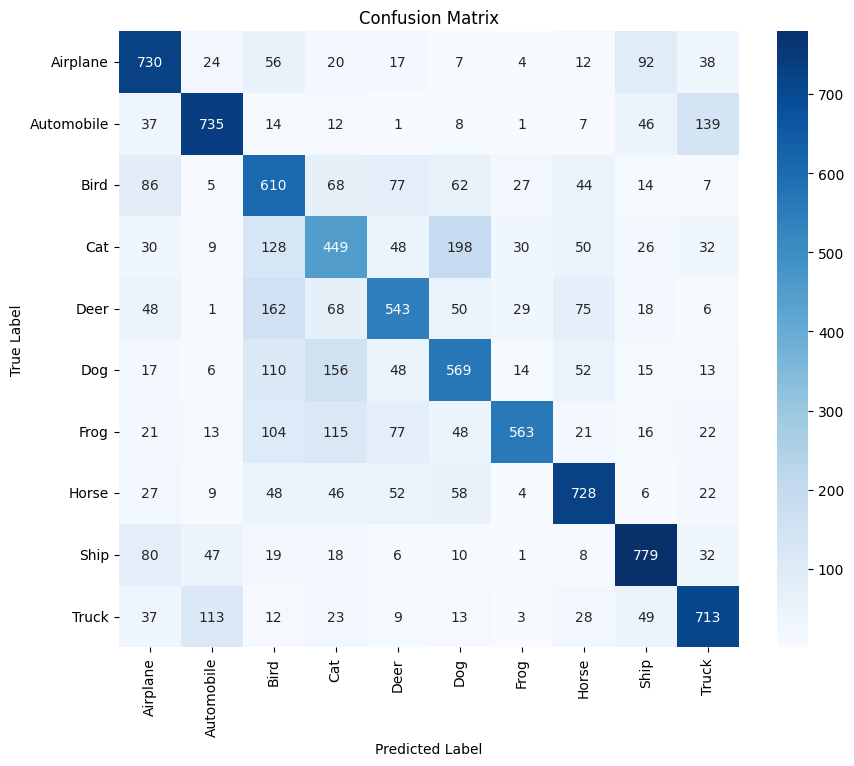

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get true classes
true_classes = np.argmax(y_test_one_hot, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'],
            yticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
Non-Linearity: Activation functions enable the network to learn complex patterns and relationships in the data, moving beyond linear transformations.

Output Control: They constrain the output of neurons to specific ranges, which can be useful for interpreting results, especially in classification tasks.

Gradient Propagation: They influence how gradients are propagated during backpropagation, which is essential for model training.

Sparsity: Some activation functions promote sparsity, allowing only a subset of neurons to be activated, which can enhance model efficiency and performance.

_

2 - Key Differences between sigmoid and softmax:


Sigmoid Activation Function
Definition: The sigmoid function maps inputs to the range (0, 1).
Output: Produces a single output value, typically used for binary classification.
Use Case: Suitable for binary classification tasks where the goal is to predict a probability for one class versus another.
Behavior: Can suffer from issues like the vanishing gradient problem due to its saturation in extreme input values.


Softmax Activation Function
Definition: The softmax function converts a vector of raw scores (logits) into probabilities.
Output: Produces a probability distribution over multiple classes, summing to 1.
Use Case: Used in the output layer of multi-class classification models to classify inputs into one of several classes.
Behavior: Highlights the largest logits, providing distinct probabilities for each class based on the relative differences between the inputs.


_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

1. Use Case

Binary Crossentropy:
Used for binary classification problems where the output is either class 0 or class 1.
Suitable when you have only two classes.

Categorical Crossentropy:
Used for multi-class classification problems where each instance belongs to one class out of many (more than two).
Suitable when you have multiple classes (e.g., classifying into 10 different categories).

2. Output Format

Binary Crossentropy:
Expects a single output value (probability) between 0 and 1.
The target labels are typically a single binary label (0 or 1).

Categorical Crossentropy:
Expects an output vector representing the probabilities for each class, summing to 1.
The target labels should be one-hot encoded vectors (e.g., for 3 classes, an instance belonging to class 1 would be represented as [1, 0, 0]).

3. Loss Calculation

Binary Crossentropy:

The formula for a single instance is:

Binary Crossentropy=−(ylog(p)+(1−y)log(1−p))

Here, 𝑦 is the true label (0 or 1) and 𝑝 is the predicted probability of the positive class.

Categorical Crossentropy:
The formula for multiple classes is:
Categorical Crossentropy=− i=1∑C​ yi ​log(pi​ )

Here,C is the number of classes, 𝑦𝑖 is the true label (1 for the correct class and 0 otherwise), and 𝑝𝑖is the predicted probability for class i.

4. Examples

Binary Crossentropy:

Example: Classifying emails as spam (1) or not spam (0).

Categorical Crossentropy:

Example: Classifying images into one of 10 classes (e.g., dogs, cats, birds, etc.).
_
